In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# โหลดข้อมูล
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names) #input for train
y = pd.Series(data.target, name='target') # answer of dataset
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# แบ่งข้อมูลเป็นชุดฝึกสอนและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [10]:
# สร้างและฝึกสอน Model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

# train model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [11]:
# ทำนายผลลัพธ์
y_pred = rf_classifier.predict(X_test)

In [12]:
# ประเมินประสิทธิภาพของ Model
#y_test: answer ที่แยกรอเอามาเทียบกับ y_pred
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.97      0.94      0.96        69

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



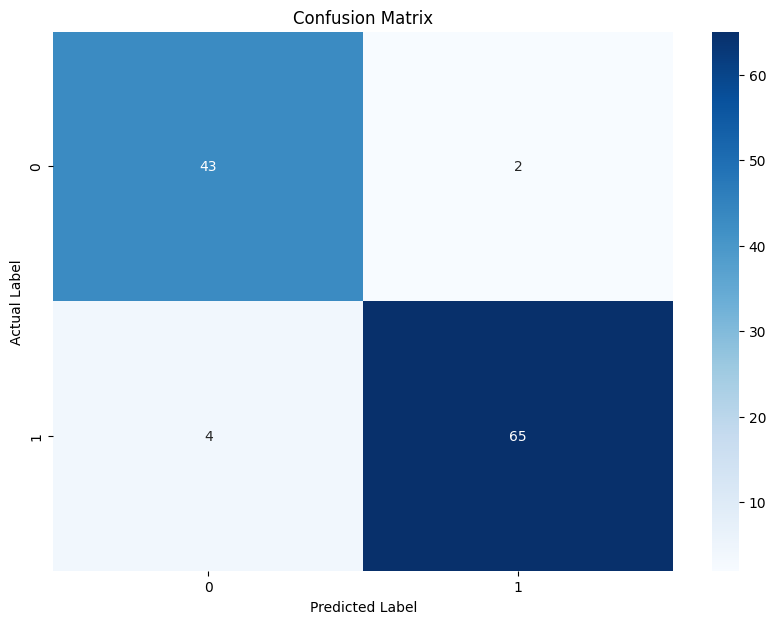

In [13]:
# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

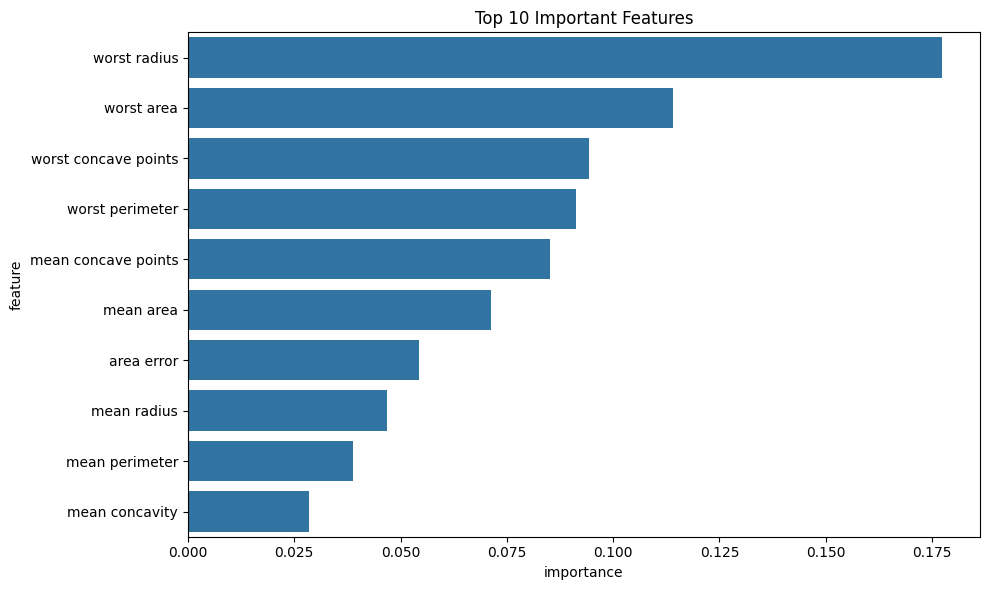

In [14]:
# แสดงความสำคัญของ Feature
feature_importance = pd.DataFrame({'feature': data.feature_names, 'importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

In [15]:
# เปรียบเทียบประสิทธิภาพกับ Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=2)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Random Forest Accuracy: 0.9473684210526315
Decision Tree Accuracy: 0.9122807017543859


In [16]:
# เปรียบเทียบการทำนายของ Random Forest และ Decision Tree
comparison = pd.DataFrame({'Actual': y_test, 'Random Forest': y_pred, 'Decision Tree': dt_pred})
print("\nSample Predictions:")
print(comparison.sample(10))


Sample Predictions:
     Actual  Random Forest  Decision Tree
120       1              1              1
291       1              1              1
200       1              1              1
332       1              1              1
312       1              1              1
516       0              0              0
246       1              1              1
230       0              0              0
304       1              1              1
471       1              1              0


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [22]:
# โหลดข้อมูล
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data = pd.read_csv(url, names=columns, na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [21]:
data = data.dropna()

In [23]:
# แปลง Column เป้าหมายให้เป็น Binary (0 = ไม่เป็นโรคหัวใจ, 1 = เป็นโรคหัวใจ)
data["num"] = (data["num"] > 0).astype(int)

In [24]:
# แยก Feature และ target
X = data.drop("num", axis=1)
y = data["num"]

In [25]:
# แบ่งข้อมูลเป็นชุดฝึกสอนและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [26]:
# สร้างและฝึกสอน Model Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [27]:
# ทำนายผลลัพธ์
y_pred = rf_classifier.predict(X_test)

In [28]:
# ประเมินประสิทธิภาพของ Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        37
           1       0.86      0.75      0.80        24

    accuracy                           0.85        61
   macro avg       0.85      0.83      0.84        61
weighted avg       0.85      0.85      0.85        61



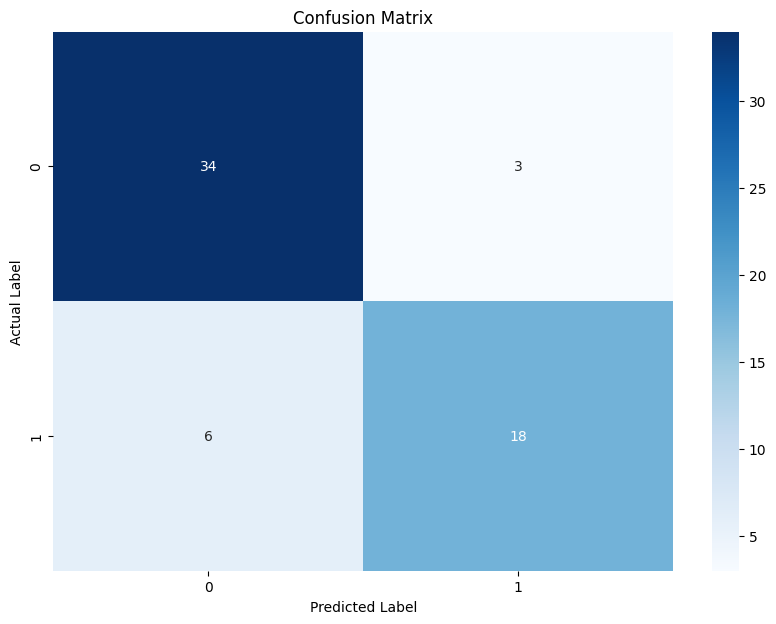

In [29]:
# สร้าง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

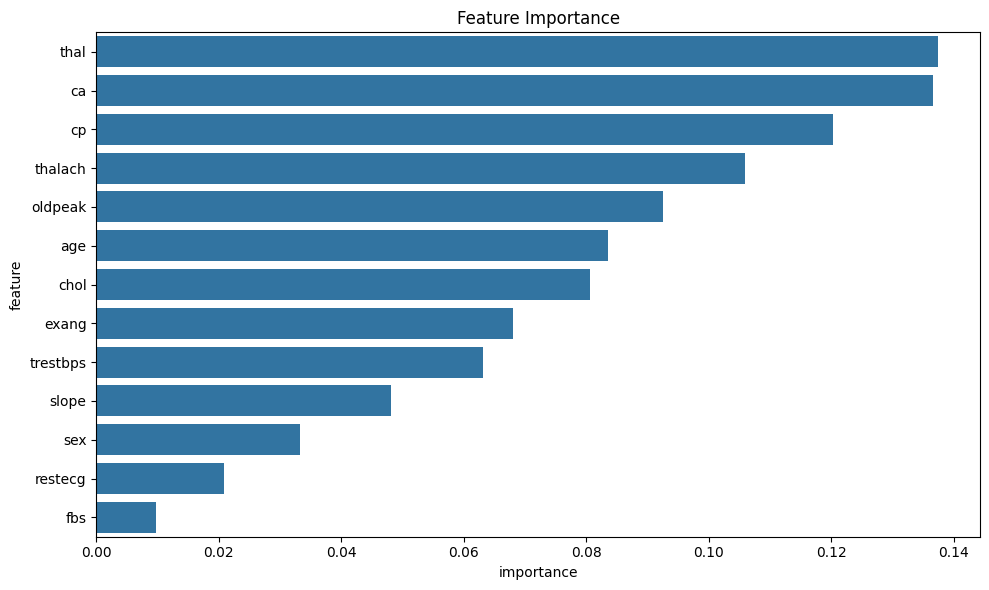

In [30]:
# แสดงความสำคัญของ Feature
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

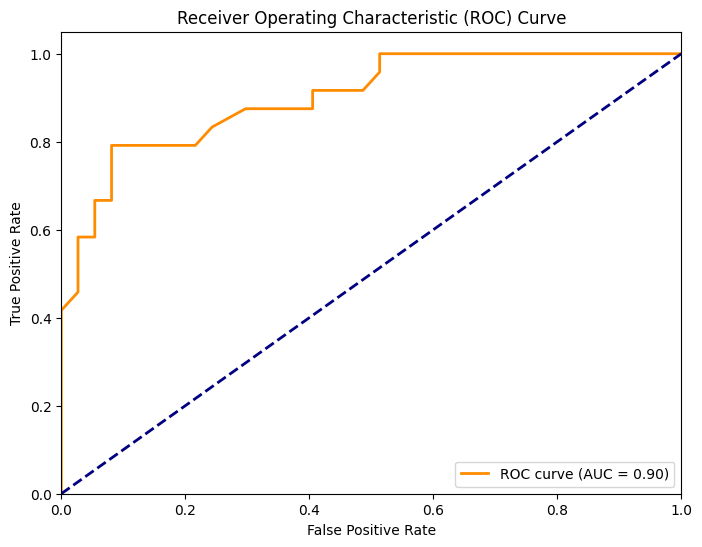

In [31]:
# สร้าง ROC Curve
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
# ปรับแต่ง Parameter ด้วย GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=2),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [33]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.8430272108843537


In [34]:
# ใช้ Model ที่ดีที่สุดจาก GridSearchCV
best_rf_classifier = grid_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test)

print("\nBest Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nBest Model Classification Report:\n", classification_report(y_test, y_pred_best))


Best Model Accuracy: 0.8360655737704918

Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87        37
           1       0.85      0.71      0.77        24

    accuracy                           0.84        61
   macro avg       0.84      0.81      0.82        61
weighted avg       0.84      0.84      0.83        61



In [35]:
# สร้าง Model สุดท้ายโดยใช้ข้อมูลทั้งหมด
final_rf_classifier = RandomForestClassifier(**grid_search.best_params_, random_state=2)
final_rf_classifier.fit(X, y)  # ใช้ X และ y ทั้งหมด ไม่แบ่ง Train/Test

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=2)

In [37]:
import joblib

joblib.dump(best_rf_classifier, 'best_rf_model.joblib')

['best_rf_model.joblib']